In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 16.8 MB/s eta 0:00:00


In [2]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 

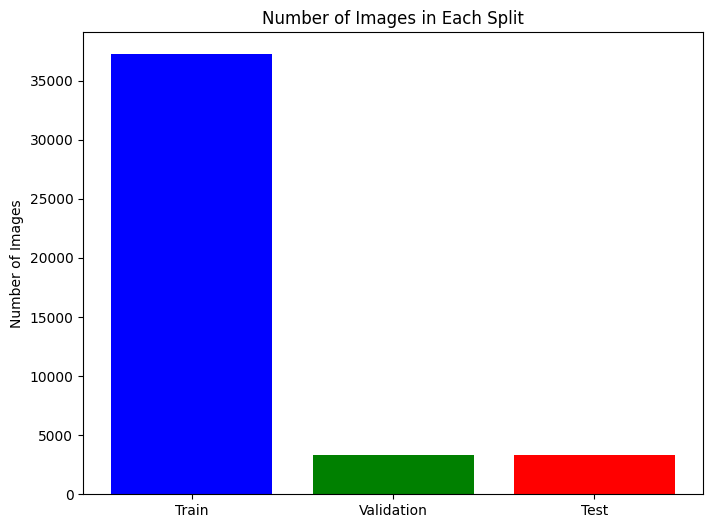

Training Set Examples:


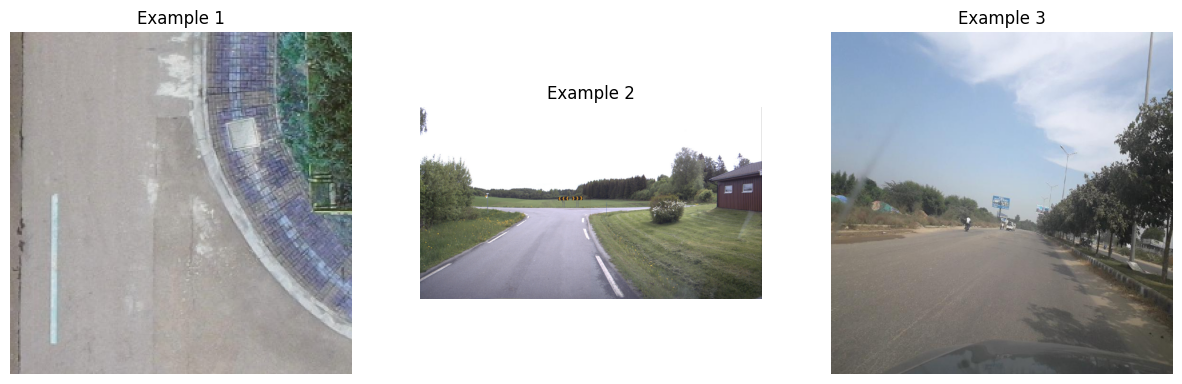

Validation Set Examples:


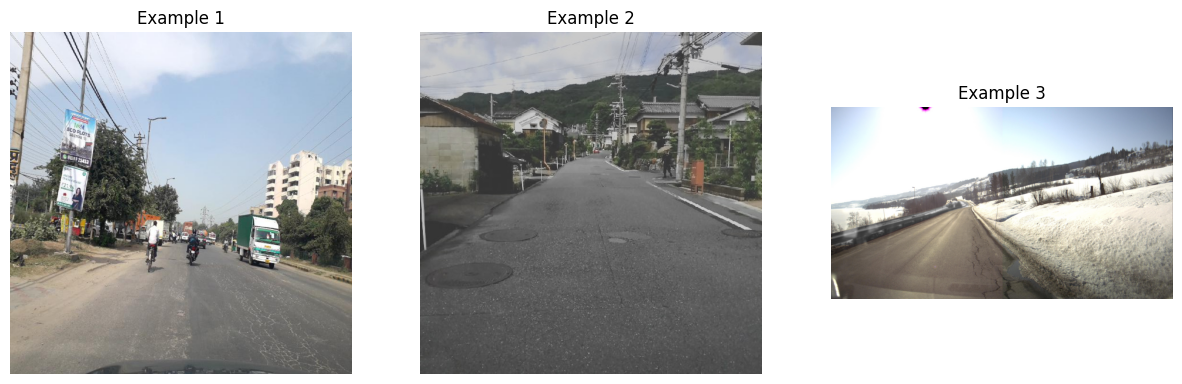

Test Set Examples:


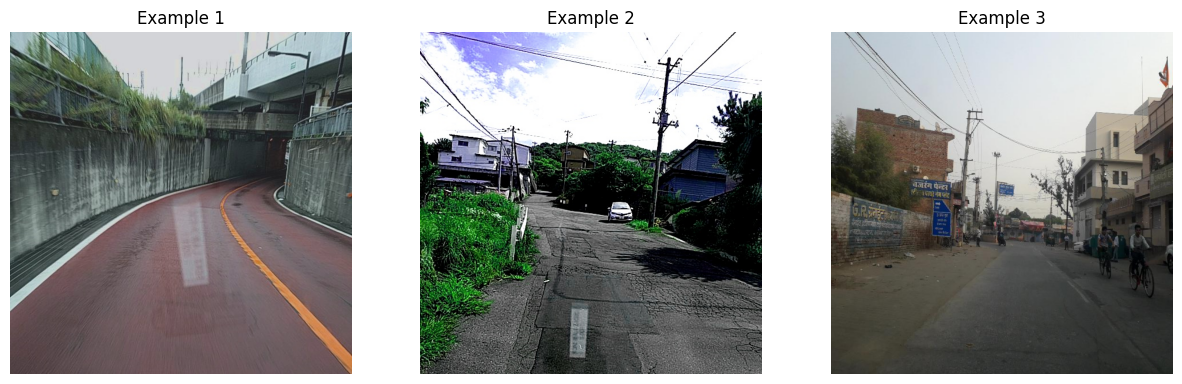

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the dataset splits
train_dir = '/kaggle/input/rdd2022/datasets/train/images'
val_dir = '/kaggle/input/rdd2022/datasets/valid/images'
test_dir = '/kaggle/input/rdd2022/datasets/test/images'

# Function to count images in a directory
def count_images(directory):
    return len([f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')])

# Count images in each split
train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_images(test_dir)

# Bar plot showing the number of images in each split
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Validation', 'Test'], [train_count, val_count, test_count], color=['blue', 'green', 'red'])
plt.title('Number of Images in Each Split')
plt.ylabel('Number of Images')
plt.show()

# Function to display some example images from a directory
def display_example_images(directory, num_images=3):
    # Get all image paths
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Randomly select a few images
    selected_images = random.sample(image_files, num_images)
    
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(selected_images, start=1):
        img_path = os.path.join(directory, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f'Example {i}')
        plt.axis('off')
    plt.show()

# Display 3 example images from the training, validation, and test sets
print("Training Set Examples:")
display_example_images(train_dir)

print("Validation Set Examples:")
display_example_images(val_dir)

print("Test Set Examples:")
display_example_images(test_dir)


In [4]:
# Create the rdd2022.yaml file
yaml_content = """
train: /kaggle/input/rdd2022/datasets/train/images
val: /kaggle/input/rdd2022/datasets/valid/images
test: /kaggle/input/rdd2022/datasets/test/images
nc: 4
names: ['D00', 'D10', 'D20', 'D40']
"""

with open('rdd2022.yaml', 'w') as file:
    file.write(yaml_content)


In [5]:
import torch
# Ensure GPUs are available
if torch.cuda.device_count() > 1:
    print(f'Using {torch.cuda.device_count()} GPUs for training.')


Using 2 GPUs for training.


In [6]:
from ultralytics import YOLO
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the YOLOv8 model
model = YOLO('/kaggle/input/run04_last_model/pytorch/default/1/last.pt')

# Define learning rate parameters
lr = 1.44E-05  # Adjusted based on last run's learning rate

# Train the model with your custom dataset on multiple GPUs
model.train(
    data='/kaggle/working/rdd2022.yaml',
    epochs=70,              # Increased epochs for better convergence
    batch=32,               # Adjusted batch size as per GPU usage
    imgsz=640,              # Increased image size for better accuracy
    lr0=lr,                 # Set initial learning rate
    optimizer='SGD',        # Using SGD for potentially better generalization
    augment=True,           # Use augmentations to improve performance
    mosaic=0.4,             # Reduced mosaic to avoid over-augmentation
    mixup=0.15,             # Slight increase in mixup
    flipud=0.4,             # Reduced vertical flip probability
    fliplr=0.6,             # Slightly increased horizontal flip probability
    name='yolov8RUN05_rdd2022',
    device="0,1"            # Use both GPUs
)


# Save the trained model
model.save('best_model.pt')

# Validate the model
metrics = model.val(device="0,1")
print(f'Validation Metrics: {metrics}')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/run04_last_model/pytorch/default/1/last.pt, data=/kaggle/working/rdd2022.yaml, epochs=70, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=yolov8RUN05_rdd2022, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, 

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 37230 images, 10012 backgrounds, 0 corrupt: 100%|██████████| 37230/37230 [03:15<00:00, 190.05it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/rdd2022/datasets/train is not writeable, cache not saved.


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/rdd2022/datasets/valid/labels... 3286 images, 865 backgrounds, 0 corrupt: 100%|██████████| 3286/3286 [00:18<00:00, 176.06it/s]
train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 21157 images, 8950 backgrounds, 0 corrupt:  57%|█████▋    | 21157/37230 [00:20<00:14, 1108.77it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/rdd2022/datasets/valid is not writeable, cache not saved.


train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 23378 images, 10012 backgrounds, 0 corrupt:  63%|██████▎   | 23378/37230 [00:23<00:15, 872.55it/s]

Plotting labels to runs/detect/yolov8RUN05_rdd2022/labels.jpg... 


train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 29389 images, 10012 backgrounds, 0 corrupt:  79%|███████▉  | 29389/37230 [00:29<00:07, 1044.42it/s]

optimizer: SGD(lr=1.44e-05, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 35696 images, 10012 backgrounds, 0 corrupt:  96%|█████████▌| 35696/37230 [00:35<00:01, 1062.87it/s]

TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8RUN05_rdd2022
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/rdd2022/datasets/train/labels... 37230 images, 10012 backgrounds, 0 corrupt: 100%|██████████| 37230/37230 [00:37<00:00, 991.10it/s]
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
       1/70      2.29G      1.723      1.861      1.577          7        640: 100%|██████████| 1164/1164 [08:34<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]


                   all       3286       4944      0.564      0.501      0.515       0.26


  0%|          | 0/1164 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.19G      1.717      1.846      1.573          9        640: 100%|██████████| 1164/1164 [08:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.53it/s]


                   all       3286       4944      0.552      0.507      0.517      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.33G      1.706      1.853      1.573         16        640: 100%|██████████| 1164/1164 [07:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.76it/s]


                   all       3286       4944      0.558      0.509      0.519      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70       2.3G      1.708      1.842      1.574          8        640: 100%|██████████| 1164/1164 [07:46<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.76it/s]


                   all       3286       4944      0.553       0.51      0.519      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.33G      1.708      1.832      1.574         19        640: 100%|██████████| 1164/1164 [07:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.68it/s]


                   all       3286       4944      0.556       0.51      0.519      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.18G      1.699      1.834      1.564          9        640: 100%|██████████| 1164/1164 [07:52<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.54it/s]


                   all       3286       4944      0.555      0.509      0.519      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.28G      1.708       1.85      1.574         13        640: 100%|██████████| 1164/1164 [07:55<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.69it/s]


                   all       3286       4944      0.556      0.512       0.52      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.27G      1.709       1.85      1.574          6        640: 100%|██████████| 1164/1164 [07:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.69it/s]


                   all       3286       4944      0.554      0.514      0.519      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.19G      1.713      1.842       1.57          8        640: 100%|██████████| 1164/1164 [08:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.76it/s]


                   all       3286       4944      0.556      0.514      0.519      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.29G      1.708       1.84      1.568         17        640: 100%|██████████| 1164/1164 [07:55<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.68it/s]


                   all       3286       4944      0.559      0.511       0.52      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70       2.2G      1.724      1.855      1.581         18        640: 100%|██████████| 1164/1164 [07:53<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.556      0.509       0.52      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70       2.2G      1.712      1.846       1.57         12        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.61it/s]


                   all       3286       4944      0.559      0.509       0.52      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.17G      1.726      1.852      1.576         13        640: 100%|██████████| 1164/1164 [08:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.77it/s]


                   all       3286       4944       0.56       0.51      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.29G      1.708      1.849      1.573         31        640: 100%|██████████| 1164/1164 [07:55<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.70it/s]


                   all       3286       4944      0.561      0.509      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.27G      1.719      1.851      1.576         10        640: 100%|██████████| 1164/1164 [07:59<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.562      0.509      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.27G      1.717      1.851      1.575         17        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.62it/s]


                   all       3286       4944      0.559      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.27G      1.717       1.84      1.573          4        640: 100%|██████████| 1164/1164 [07:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.71it/s]


                   all       3286       4944      0.559      0.511       0.52      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.28G      1.719      1.853      1.576          8        640: 100%|██████████| 1164/1164 [07:47<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.66it/s]


                   all       3286       4944      0.561      0.509      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.19G      1.714       1.84       1.57         12        640: 100%|██████████| 1164/1164 [07:52<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.61it/s]


                   all       3286       4944      0.561      0.508       0.52      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70       2.2G       1.71      1.841      1.573         14        640: 100%|██████████| 1164/1164 [07:59<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.60it/s]


                   all       3286       4944      0.559      0.506       0.52      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.19G      1.719      1.854      1.576          5        640: 100%|██████████| 1164/1164 [07:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.63it/s]


                   all       3286       4944      0.561      0.508       0.52      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.19G      1.712      1.848      1.569         18        640: 100%|██████████| 1164/1164 [08:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.59it/s]


                   all       3286       4944      0.557      0.512      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.17G      1.706      1.835      1.567         20        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.62it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.19G      1.714       1.85      1.572         15        640: 100%|██████████| 1164/1164 [08:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.559       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.26G      1.717      1.845      1.576         14        640: 100%|██████████| 1164/1164 [07:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.62it/s]


                   all       3286       4944      0.557      0.512      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.29G      1.705      1.847      1.571          7        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.51it/s]


                   all       3286       4944      0.559       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.19G      1.717      1.863      1.578         13        640: 100%|██████████| 1164/1164 [08:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.61it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.29G      1.718      1.855      1.578         26        640: 100%|██████████| 1164/1164 [08:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.51it/s]


                   all       3286       4944      0.559       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.19G      1.719      1.848      1.571         12        640: 100%|██████████| 1164/1164 [08:06<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.64it/s]


                   all       3286       4944      0.561      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70       2.2G      1.712      1.838      1.567         26        640: 100%|██████████| 1164/1164 [08:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.62it/s]


                   all       3286       4944      0.559       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.17G      1.717      1.866      1.581         19        640: 100%|██████████| 1164/1164 [08:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.58it/s]


                   all       3286       4944      0.557       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.29G      1.715      1.847       1.57         22        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.63it/s]


                   all       3286       4944       0.56      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.17G      1.723      1.853      1.574         18        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.55it/s]


                   all       3286       4944      0.558       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.17G      1.722      1.854      1.575         16        640: 100%|██████████| 1164/1164 [07:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.59it/s]


                   all       3286       4944       0.56      0.509      0.522      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70       2.2G      1.718      1.849      1.579         22        640: 100%|██████████| 1164/1164 [08:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.60it/s]


                   all       3286       4944       0.56      0.509      0.522      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.27G      1.718      1.847      1.573         19        640: 100%|██████████| 1164/1164 [08:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.52it/s]


                   all       3286       4944       0.56      0.509      0.522      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.19G      1.712      1.843      1.575         12        640: 100%|██████████| 1164/1164 [08:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.65it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.29G      1.712      1.853      1.574         17        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.60it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70       2.2G      1.707      1.849      1.571         15        640: 100%|██████████| 1164/1164 [07:49<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.75it/s]


                   all       3286       4944       0.56      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.29G       1.72      1.851      1.579         15        640: 100%|██████████| 1164/1164 [07:53<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.68it/s]


                   all       3286       4944       0.56      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70       2.2G      1.714      1.848      1.572         15        640: 100%|██████████| 1164/1164 [07:55<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.562      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.29G      1.715      1.852       1.57         18        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.71it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.38G      1.715      1.852      1.578         12        640: 100%|██████████| 1164/1164 [07:55<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.56it/s]


                   all       3286       4944      0.556      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.19G      1.712      1.848      1.573         22        640: 100%|██████████| 1164/1164 [07:53<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.66it/s]


                   all       3286       4944      0.558      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.17G      1.719      1.841      1.577          6        640: 100%|██████████| 1164/1164 [07:54<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.65it/s]


                   all       3286       4944      0.562      0.509      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.25G      1.728      1.852      1.577         14        640: 100%|██████████| 1164/1164 [07:53<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.54it/s]


                   all       3286       4944      0.558      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70       2.2G      1.712      1.838      1.571          7        640: 100%|██████████| 1164/1164 [07:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.75it/s]


                   all       3286       4944      0.559      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.18G      1.713       1.85      1.571         12        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.65it/s]


                   all       3286       4944      0.559      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.29G      1.712      1.846      1.567          9        640: 100%|██████████| 1164/1164 [07:59<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.52it/s]


                   all       3286       4944      0.561      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.19G       1.71      1.844      1.569         25        640: 100%|██████████| 1164/1164 [07:58<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.68it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.29G      1.714      1.846       1.57         27        640: 100%|██████████| 1164/1164 [08:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.69it/s]


                   all       3286       4944       0.56       0.51      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.18G      1.712      1.848      1.564         12        640: 100%|██████████| 1164/1164 [08:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.58it/s]


                   all       3286       4944       0.56       0.51      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70       2.3G      1.708      1.836      1.571          5        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.53it/s]


                   all       3286       4944      0.561      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70       2.2G      1.722      1.858      1.578         10        640: 100%|██████████| 1164/1164 [07:56<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.68it/s]


                   all       3286       4944       0.56      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.27G      1.712       1.85      1.572         40        640: 100%|██████████| 1164/1164 [08:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.64it/s]


                   all       3286       4944      0.561      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.17G      1.714      1.849      1.577          6        640: 100%|██████████| 1164/1164 [08:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.53it/s]


                   all       3286       4944      0.561      0.511      0.521      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70       2.2G      1.711      1.849      1.575         24        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.53it/s]


                   all       3286       4944       0.56      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.29G      1.717      1.846      1.571         20        640: 100%|██████████| 1164/1164 [08:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.68it/s]


                   all       3286       4944      0.561      0.511      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.27G      1.726      1.851      1.574         25        640: 100%|██████████| 1164/1164 [08:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.72it/s]


                   all       3286       4944      0.559      0.513      0.522      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.18G      1.719       1.84       1.57         14        640: 100%|██████████| 1164/1164 [07:57<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.72it/s]


                   all       3286       4944      0.562      0.511      0.521      0.264
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.27G      1.636      1.621      1.518         26        640: 100%|██████████| 1164/1164 [07:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.61it/s]


                   all       3286       4944      0.559      0.512      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.27G      1.638      1.623       1.52         26        640: 100%|██████████| 1164/1164 [07:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.60it/s]


                   all       3286       4944       0.56      0.513      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.17G      1.638      1.612      1.521          4        640: 100%|██████████| 1164/1164 [07:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.76it/s]


                   all       3286       4944       0.56      0.512      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.27G      1.633      1.624      1.518         14        640: 100%|██████████| 1164/1164 [07:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.559      0.514      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.27G      1.644       1.63      1.526          6        640: 100%|██████████| 1164/1164 [07:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.59it/s]


                   all       3286       4944       0.56      0.513      0.521      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.27G      1.632      1.626      1.518          9        640: 100%|██████████| 1164/1164 [07:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.67it/s]


                   all       3286       4944      0.561      0.511      0.521      0.263


  0%|          | 0/1164 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.27G      1.637      1.622      1.521          3        640: 100%|██████████| 1164/1164 [07:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.72it/s]


                   all       3286       4944      0.562      0.509      0.521      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.18G      1.633      1.625      1.519         10        640: 100%|██████████| 1164/1164 [07:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:27<00:00,  3.78it/s]


                   all       3286       4944      0.563      0.508      0.521      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.27G      1.634       1.63      1.521         17        640: 100%|██████████| 1164/1164 [07:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:29<00:00,  3.55it/s]


                   all       3286       4944      0.564      0.509      0.521      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.29G      1.636       1.62      1.517          5        640: 100%|██████████| 1164/1164 [07:08<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:28<00:00,  3.59it/s]


                   all       3286       4944      0.566      0.508      0.521      0.263

70 epochs completed in 9.723 hours.
Optimizer stripped from runs/detect/yolov8RUN05_rdd2022/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8RUN05_rdd2022/weights/best.pt, 6.3MB

Validating runs/detect/yolov8RUN05_rdd2022/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:39<00:00,  2.58it/s]


                   all       3286       4944      0.583      0.505      0.536      0.284
                   D00        872       1639      0.532      0.405      0.411      0.217
                   D10        891       1341      0.567       0.56      0.576        0.3
                   D20        973       1199       0.65       0.67      0.711      0.416
                   D40        435        765      0.583      0.386      0.446      0.205
Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolov8RUN05_rdd2022
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/rdd2022/datasets/valid/labels... 3286 images, 865 backgrounds, 0 corrupt: 100%|██████████| 3286/3286 [00:04<00:00, 721.24it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/rdd2022/datasets/valid is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:51<00:00,  1.99it/s]


                   all       3286       4944       0.58      0.504      0.536      0.284
                   D00        872       1639      0.528      0.404       0.41      0.216
                   D10        891       1341      0.567      0.561      0.577        0.3
                   D20        973       1199      0.649      0.669      0.711      0.416
                   D40        435        765      0.578      0.384      0.445      0.205
Speed: 0.2ms preprocess, 9.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolov8RUN05_rdd20222
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe76439f820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.0

In [7]:
# Export the model to ONNX
model.export(format='onnx')

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8RUN05_rdd2022/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 236.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 208.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 242.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.7s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 23.1s, saved as 'runs/detect/yolov8RUN05_rdd2022/weight

'runs/detect/yolov8RUN05_rdd2022/weights/best.onnx'